# 4.) Find the best model and describe the business implications:

In [25]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import h5py
import scipy
from PIL import Image
from scipy import ndimage 
import pandas as pd
#from dnn_app_utils_v3 import * 
#from reg_utils import * 
%matplotlib inline

In [4]:
image_dict = {}

from pathlib import Path
from tqdm import tqdm
import os

file_names = []
labels = []

for file in sorted((Path('/Users/laikaiwen/Desktop/deep learning/week5/hw2/Dataset/Test').glob('*/*'))):
    label = str(file).split('/')[-2]  
    labels.append(label)  
    file_names.append(str(file)) 
    
print(len(file_names), len(labels))
df = pd.DataFrame.from_dict({"image": file_names, "label": labels})
print(df.shape)

10905 10905
(10905, 2)


In [5]:
df['label'].unique()

array(['Fake', 'Real'], dtype=object)

In [6]:
def convert_to_array(image_path):
    image = Image.open(image_path)
    resized_img = image.resize(size=(60, 60))
    resized_array = np.asarray(resized_img)
    return resized_array
df['image'] = df['image'].apply(convert_to_array)

In [7]:
df['label'] = df['label'].replace({'Fake': 0, 'Real': 1})

In [8]:
image_array = np.array(df['image'].tolist()) 
label_array = np.array(df['label'].values.tolist())

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X1, X_test, Y1, y_test = train_test_split(image_array, label_array,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X1,Y1,test_size = 0.20)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [12]:
X_train.shape

(6979, 60, 60, 3)

In [20]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Users/laikaiwen/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 97ms/step - binary_accuracy: 0.5364 - loss: 0.8956
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - binary_accuracy: 0.5835 - loss: 0.7474
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 132ms/step - binary_accuracy: 0.6109 - loss: 0.6785
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 16s 147ms/step - binary_accuracy: 0.6478 - loss: 0.6301
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - binary_accuracy: 0.6857 - loss: 0.5909
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - binary_accuracy: 0.7025 - loss: 0.5431
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - binary_accuracy: 0.7284 - loss: 0.5376
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - binary_accuracy: 0.7443 - loss: 0.5182
Epoch 9/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - binary_accuracy: 0.7519 - loss: 0.4996
Epoch 10/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - binary_accuracy: 0.7617 - loss: 0.4808
Epoch 11/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 1

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

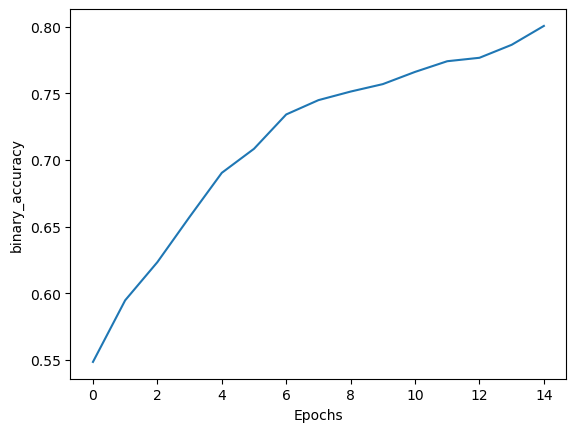

In [21]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64)

df = pd.DataFrame(history.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - binary_accuracy: 0.7077 - loss: 0.6217 
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - binary_accuracy: 0.7211 - loss: 0.5223 
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - binary_accuracy: 0.7475 - loss: 0.5092
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - binary_accuracy: 0.7765 - loss: 0.4704 
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - binary_accuracy: 0.8021 - loss: 0.4351
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - binary_accuracy: 0.7886 - loss: 0.4414
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - binary_accuracy: 0.8293 - loss: 0.4015 
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - binary_accuracy: 0.8458 - loss: 0.3717 
Epoch 9/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - binary_accuracy: 0.8184 - loss: 0.3915
Epoch 10/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - binary_accuracy: 0.8213 - loss: 0.3865
Epoch 11/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - binary_accuracy: 0

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

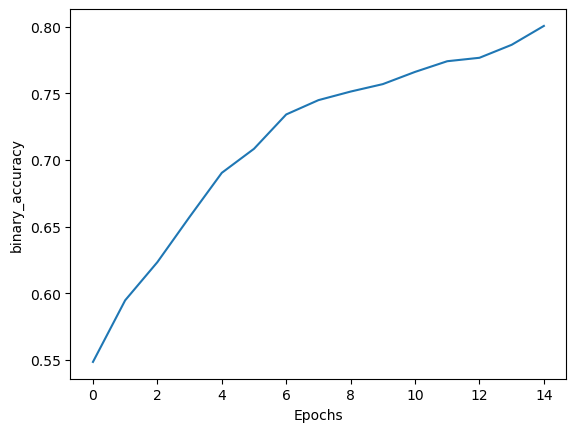

In [22]:
history2 = model4.fit(X_test, y_test, epochs=15, batch_size=64)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

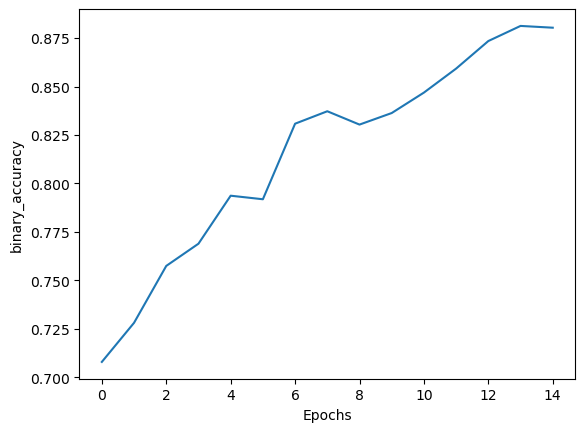

In [26]:
df = pd.DataFrame(history2.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - binary_accuracy: 0.6691 - loss: 0.8051
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - binary_accuracy: 0.7306 - loss: 0.5960
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - binary_accuracy: 0.7217 - loss: 0.5727
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - binary_accuracy: 0.7581 - loss: 0.5005
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - binary_accuracy: 0.7927 - loss: 0.4610
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - binary_accuracy: 0.7989 - loss: 0.4182
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - binary_accuracy: 0.8241 - loss: 0.4027
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - binary_accuracy: 0.8226 - loss: 0.3775
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - binary_accuracy: 0.8417 - loss: 0.3383
Epoch 10/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - binary_accuracy: 0.8442 - loss: 0.3359 
Epoch 11/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - binary_accuracy: 0.8596

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

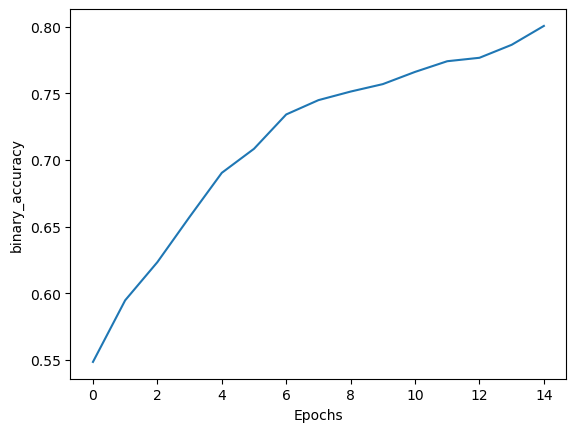

In [23]:
history3 = model4.fit(X_cv, y_cv, epochs=15, batch_size=64)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

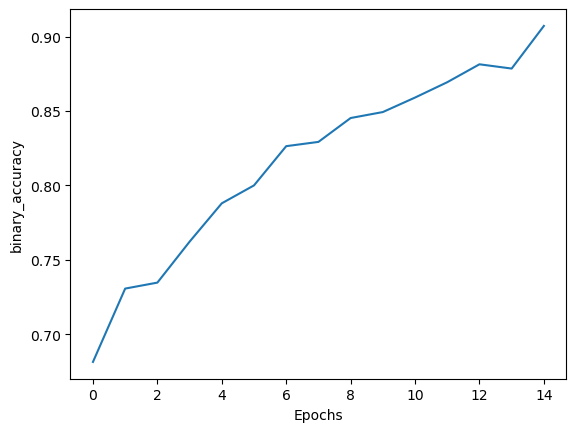

In [27]:
df = pd.DataFrame(history3.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")